# Ejercicio 3

En este enlace puedes descargar un dataset que recoge diferentes características de vino rojo portugués "Vinho Verde" y la calidad del mismo. Crea un modelo de clasificación usando NaiveBayes (GaussianNB) y KNN.

In [27]:
# Importamos las librerías necesarias
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import neighbors

In [28]:
# Cargamos los datos
df = pd.read_csv("csv/winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


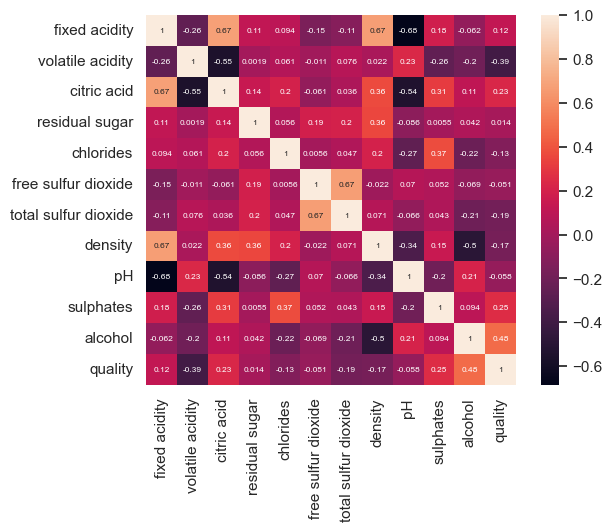

In [29]:
# Hacemos la correlación de las variables y visualizamos un mapa de calor
sns.set()  # Configuración de estilo para Seaborn
sns.heatmap(df.corr(), square=True, annot=True, annot_kws={'size': 6})  # Creación y visualización del mapa de calor
# annot_kws: cambia el tamaño de la letra de los valores de la matriz

# Muestra la matriz de correlación sin visualizarla gráficamente
df.corr()

# Creación de conjuntos de datos: características (X) y variable objetivo (y)
X = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
y = df['quality']

# División del conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

## NaiveBayes (GaussianNB)

In [30]:
# Importar el clasificador Naive Bayes Gaussiano desde scikit-learn
from sklearn.naive_bayes import GaussianNB

# Crear una instancia del modelo Naive Bayes Gaussiano
model = GaussianNB()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Predecir las etiquetas para los datos de prueba
y_pred = model.predict(X_test)

# Calcular y mostrar la precisión del modelo
accuracy_score(y_test, y_pred)

0.5113636363636364

## kNN

Max value: 0.5368 with 1 neighbors for weights: uniform
Max value: 0.5956 with 40 neighbors for weights: distance


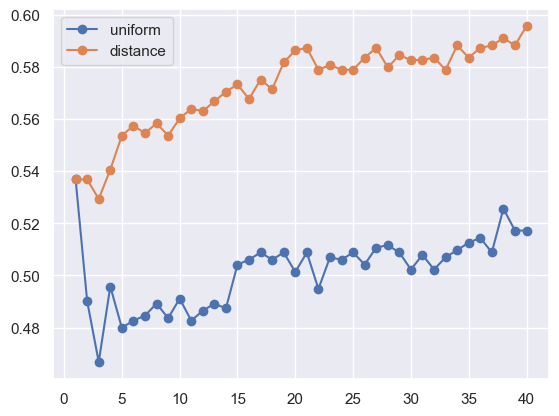

In [31]:

# Configurar la validación cruzada con 5 splits y sin aleatorización
cv = KFold(n_splits=5, shuffle=False)

# Combina los conjuntos de entrenamiento y las etiquetas en un solo DataFrame
train = pd.concat([X_train, y_train], axis=1)

# Iterar sobre dos tipos de ponderación ('uniform' y 'distance')
for i, weights in enumerate(['uniform', 'distance']):
    total_scores = []

    # Iterar sobre diferentes números de vecinos (de 1 a 40)
    for n_neighbors in range(1, 41):
        fold_accuracy = []

        # Configuración del clasificador KNN con el número actual de vecinos y tipo de ponderación
        knn = KNeighborsClassifier(n_neighbors, weights=weights)

        # Iterar sobre los splits de la validación cruzada
        for train_fold, test_fold in cv.split(train):
            # División aleatoria de los datos en conjunto de entrenamiento y prueba
            f_train = train.iloc[train_fold]
            f_test = train.iloc[test_fold]

            # Entrenamiento y predicción del modelo KNN
            knn.fit(X=f_train.drop(['quality'], axis=1), y=f_train['quality'])
            y_pred = knn.predict(X=f_test.drop(['quality'], axis=1))

            # Evaluación del modelo y almacenamiento de la precisión
            acc = accuracy_score(f_test['quality'], y_pred)
            fold_accuracy.append(acc)

        # Calcular la precisión media para el número actual de vecinos
        total_scores.append(sum(fold_accuracy) / len(fold_accuracy))

    # Graficar los resultados para cada tipo de ponderación
    plt.plot(range(1, 41), total_scores, marker='o', label=weights)
    print('Max value: {:.4f} with {} neighbors for weights: {}'.format(max(total_scores), total_scores.index(max(total_scores)) + 1, weights))

# Mostrar la leyenda y la gráfica
plt.legend()
plt.show()

Precision: 0.5700757575757576


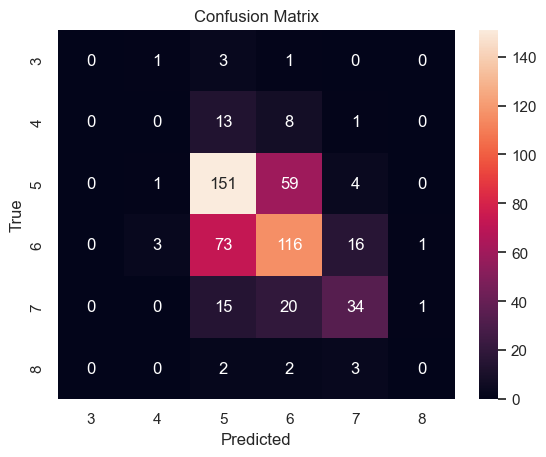

In [32]:
# Seleccionamos 5 vecinos y ponderación 'distance' para el clasificador KNN
n_neighbors = 5
weights = 'distance'
knn = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights)

# Entrenamos el modelo con los datos de entrenamiento
knn.fit(X=X_train, y=y_train)

# Realizamos predicciones en el conjunto de prueba
y_pred = knn.predict(X=X_test)

# Calculamos y mostramos la precisión del modelo
precision = accuracy_score(y_test, y_pred)
print('Precision:', precision)

# Calculamos y mostramos la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
classes = ['3', '4', '5', '6', '7', '8']

# Visualizamos la matriz de confusión con un mapa de calor
sns.heatmap(cm, annot=True, fmt='d', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [33]:
# Guardamos el modelo en un archivo Pickle con nombre wine_model.pkl
import pickle
pickle.dump(knn, open('wine_model.pkl','wb'))